# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[1,1,0,0]]).T

In [20]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
# define syn1

iter = 0

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]


In [9]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

In [10]:
syn1

array([[-0.5910955 ],
       [ 0.75623487],
       [-0.94522481],
       [ 0.34093502]])

In [11]:
l0 = X
l1 = nonlin(np.dot(l0,syn0))
print(l1)
l2 = nonlin(np.dot(l1,syn1))
print(l2)

[[0.44856632 0.51939863 0.45968497 0.59156505]
 [0.28639589 0.32350963 0.31236398 0.51538526]
 [0.40795614 0.62674606 0.23841622 0.49377636]
 [0.25371248 0.42628115 0.14321233 0.41732254]]
[[0.47372957]
 [0.48895696]
 [0.54384086]
 [0.54470837]]


In [12]:
l2_error = y - l2
l2_delta = l2_error * nonlin(l2,True)
l2_delta

array([[ 0.13120441],
       [ 0.12769844],
       [-0.13491494],
       [-0.13508831]])

In [14]:
l2_delta.dot(syn1.T)

array([[-0.07755434,  0.09922135, -0.12401766,  0.04473218],
       [-0.07548197,  0.09657001, -0.12070373,  0.04353687],
       [ 0.07974761, -0.10202738,  0.12752495, -0.04599723],
       [ 0.07985009, -0.10215849,  0.12768882, -0.04605634]])

In [15]:
l1_error = l2_delta.dot(syn1.T)
l1_error.dot(syn1)

array([[ 0.253352  ],
       [ 0.24658207],
       [-0.26051693],
       [-0.2608517 ]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [21]:
for iter in range(10000):
    # forward propagation
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    # how much did we miss?
    #l1_error = y - l1
     
    l2_error = y - l2
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    #l1_delta = l1_error * nonlin(l1,True)
    
    l2_delta = l2_error * nonlin(l2,True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error.dot(syn1)
    # update weights
    syn1 += np.dot(l1.T,l2_delta)
     # syn1 update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print(l2)
print("\n\n")
print(l1)

Output After Training:
[[0.50004579]
 [0.50000436]
 [0.5       ]
 [0.5       ]]



[[2.53541728e-05 3.36843560e-05 2.65172706e-05 4.51426551e-05]
 [1.95801472e-06 2.33309243e-06 2.21619890e-06 5.18848400e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


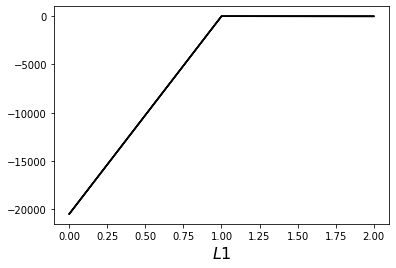

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

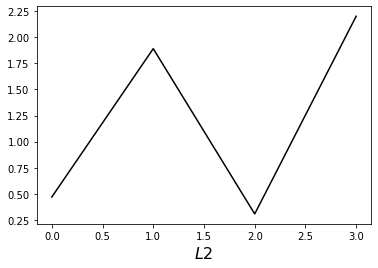

In [23]:
plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()